In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np

In [14]:
cols = ["arch", "activation", "attack", "iterations", "eps 2", "eps 4", "eps 6", "eps 8", "eps 10", "SROCC"]
data = pd.read_csv("rs/results.csv", header=0, usecols=cols)

In [15]:
data.sample(5, random_state=0)

,arch,activation,attack,iterations,eps 2,eps 4,eps 6,eps 8,eps 10,SROCC
6,wideresnet50,relu,IFGSM,1,0.022592,0.031409,0.035890,0.037915,0.038926,0.914137
2,resnet50,relu,IFGSM,1,0.031039,0.042287,0.045907,0.046951,0.047501,0.907343
1,resnet34,relu,IFGSM,1,0.038686,0.058012,0.068479,0.074239,0.077611,0.901809
7,vonenet50,relu,IFGSM,1,0.007687,0.022841,0.027502,0.036149,0.034650,0.858145
3,resnet50,silu,IFGSM,1,0.028544,0.039158,0.043211,0.044210,0.043886,0.897968


In [16]:
data[(data["arch"]=="resnet50")&(data["activation"]=="Fsilu")].loc[:,"eps 2": "eps 10"].values

array([[0.04011309, 0.06670947, 0.09172539, 0.11778046, 0.14579967]])

In [37]:
group1 = [("resnet18", "relu"), ("resnet34", "relu"), ("resnet50", "relu"), ("wideresnet50", "relu")]
group2 = [("resnet50", "relu"), ("resnet50", "silu"), ("resnet50", "relu_silu"),("resnet50", "Fsilu")]
group3 = [("wideresnet50", "relu"),("vonenet50", "relu")]

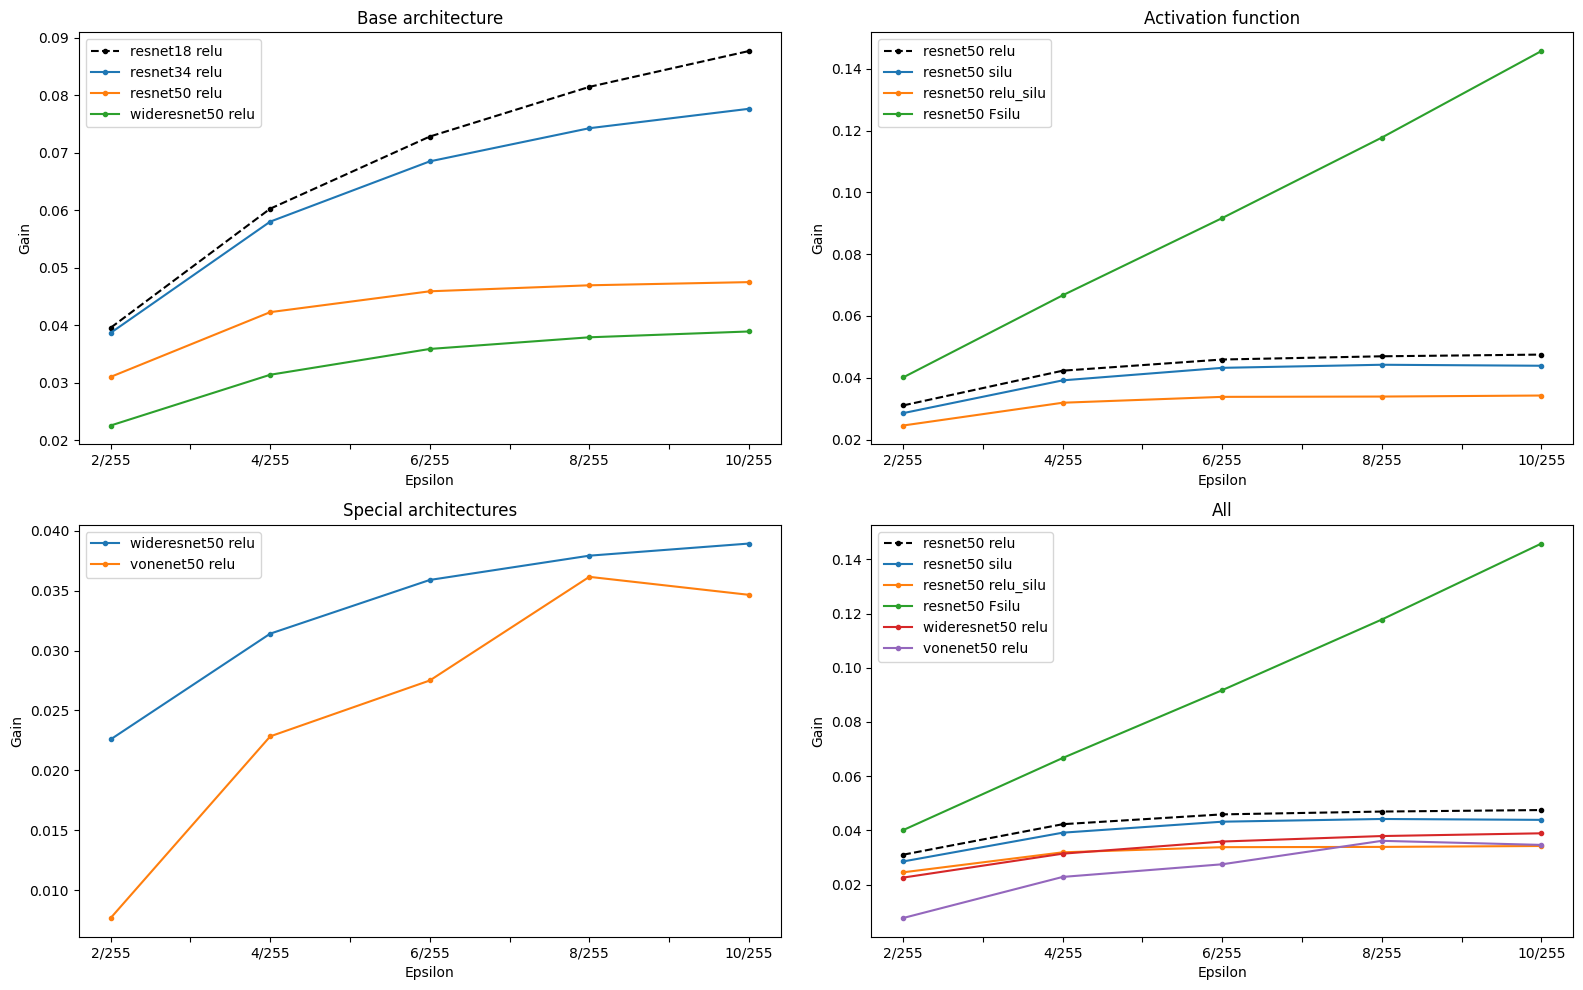

In [46]:
group = group2 + group3
groups = [group1, group2, group3, group]
epsilons = [2, 4, 6, 8, 10]
eps_labels = ['','2/255','','4/255','','6/255','','8/255','','10/255']

fig, axs = plt.subplots(2,2, figsize=(16,10), subplot_kw={"xticks": list(range(1,11)),"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})
baseline = [('resnet18','relu'),('resnet50','relu')]
axs[0,0].set_title("Base architecture")
axs[0,1].set_title("Activation function")
axs[1,0].set_title("Special architectures")
axs[1,1].set_title("All")
fig.tight_layout()

for i in range(4):
    axis = axs[i//2, i%2]
    grp = groups[i]
    for arch, activ in grp:
        y_axis = data[(data["arch"]==arch)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
        if (i==0 and (arch, activ) == baseline[0])or(i>0 and (arch, activ) == baseline[1]):
            axis.plot(epsilons, y_axis,'k--', marker=".",label=f"{arch} {activ}")
        else:
            axis.plot(epsilons, y_axis, marker=".",label=f"{arch} {activ}")
    axis.legend(loc="upper left")

plt.show()


In [47]:
x = [2, 4, 6, 8, 10]
grp = set(group1+group2+group3)
df = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df.loc[len(df)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': format(srocc,'.2f'),
                       'result': format(np.trapz(y_axis, x), '.2f')}
df.sort_values('result').style.hide()

architecture,activation,SROCC,result
vonenet50,relu,0.86,0.22
resnet50,relu_silu,0.91,0.26
wideresnet50,relu,0.91,0.27
resnet50,silu,0.90,0.33
resnet50,relu,0.91,0.35
resnet34,relu,0.90,0.52
resnet18,relu,0.90,0.56
resnet50,Fsilu,0.81,0.74
